In [1]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('dataset.csv')

# Handle missing values
df.dropna(inplace=True)

# Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Class', axis=1))

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_class = label_encoder.fit_transform(df['Class'])

# Convert data to NumPy arrays
X = scaled_features
y = encoded_class

<Figure size 1000x1000 with 0 Axes>

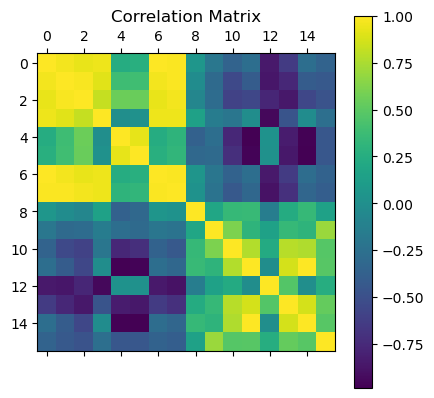

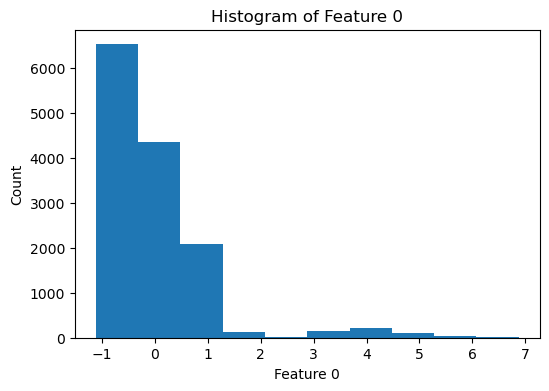

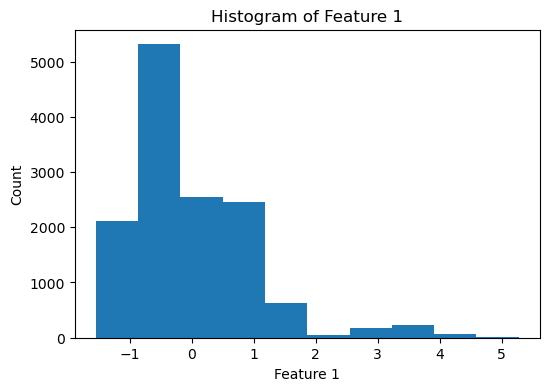

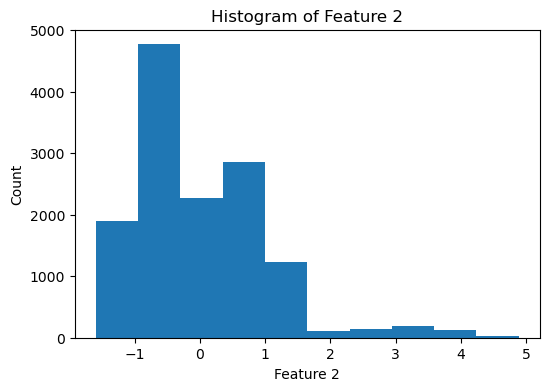

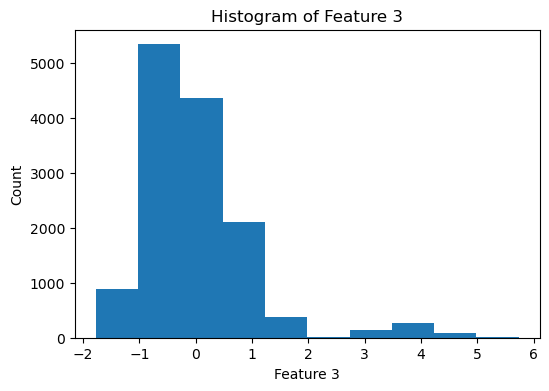

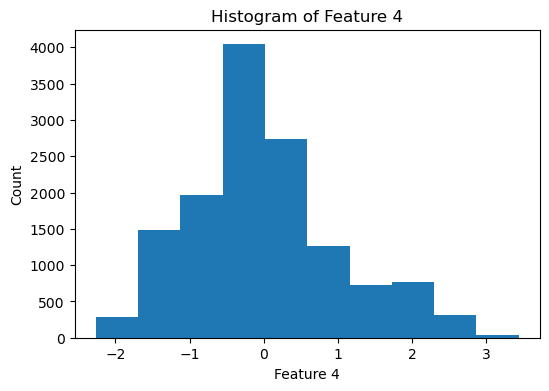

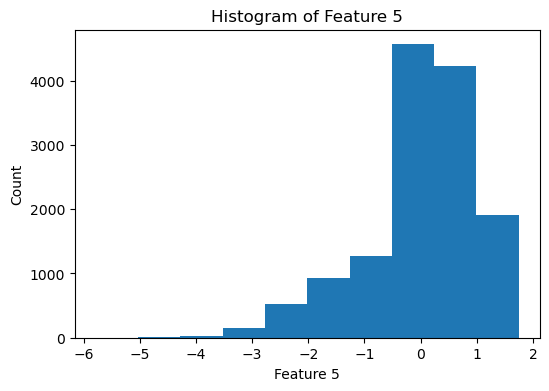

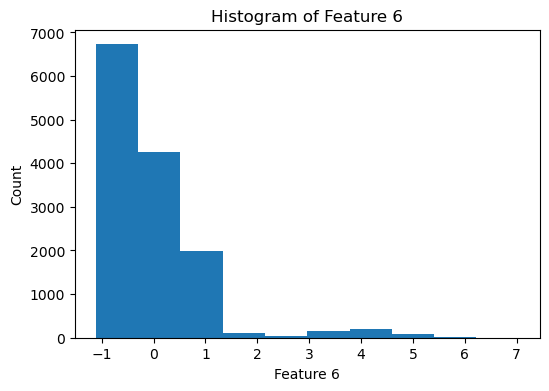

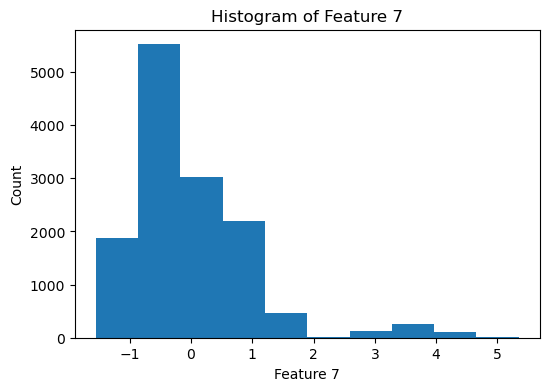

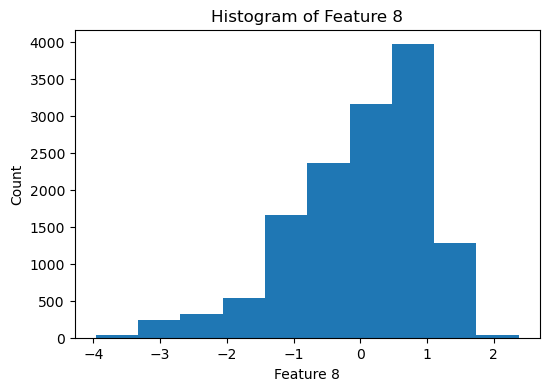

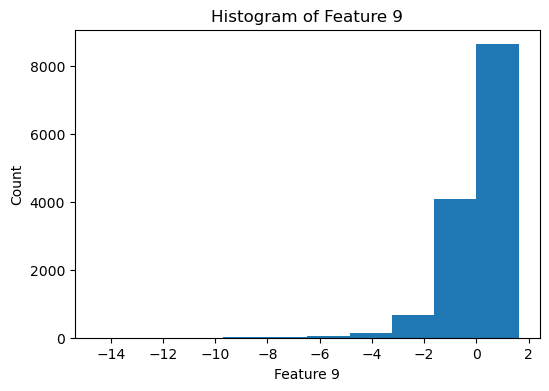

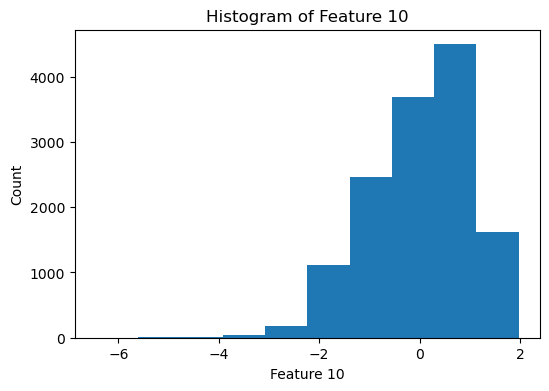

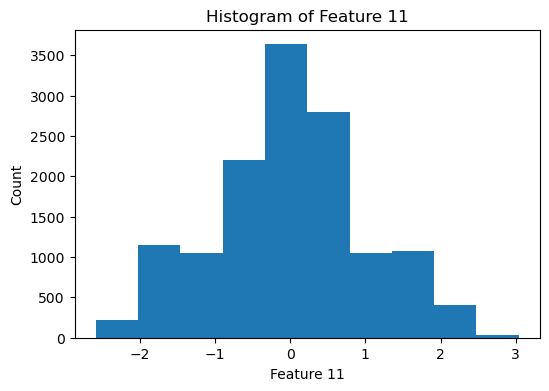

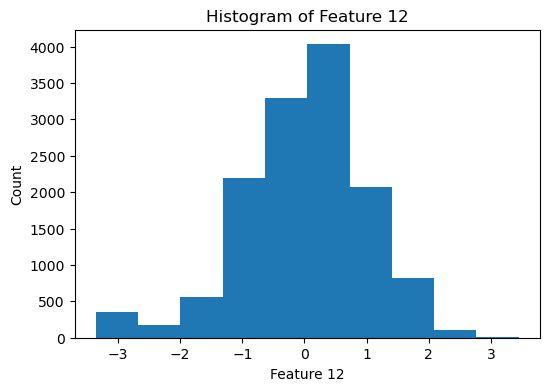

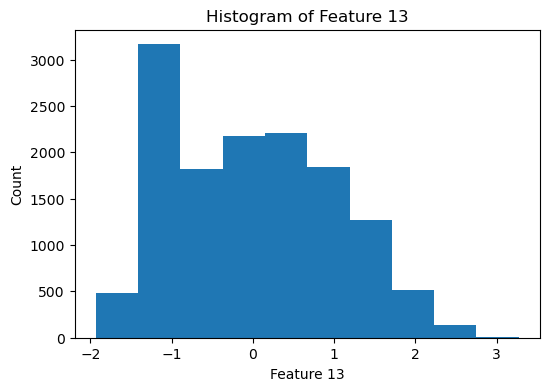

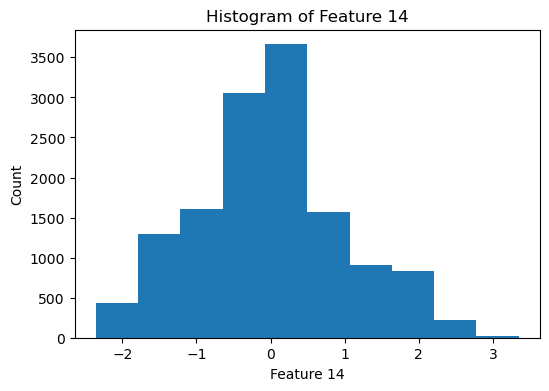

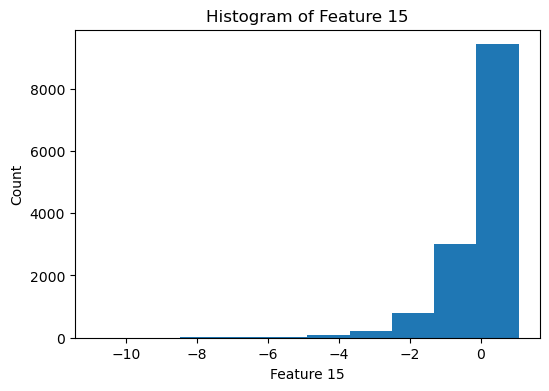

In [4]:
import matplotlib.pyplot as plt

# Pairplot of all features
plt.figure(figsize=(10, 10))
plt.matshow(np.corrcoef(X, rowvar=False))
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

# Histogram of each feature
for col_idx in range(X.shape[1]):
    plt.figure(figsize=(6, 4))
    plt.hist(X[:, col_idx])
    plt.xlabel(f'Feature {col_idx}')
    plt.ylabel('Count')
    plt.title(f'Histogram of Feature {col_idx}')
    plt.show()


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a list of classification algorithms to test
classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC(probability=True, decision_function_shape='ovr')),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')  # Avoid using variable named 'f1_score'
    roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test), average='weighted', multi_class='ovr')

    print(f'{name}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}, F1 Score = {f1:.3f}, ROC AUC = {roc_auc:.3f}')


Random Forest: Accuracy = 0.919, Precision = 0.919, Recall = 0.919, F1 Score = 0.919, ROC AUC = 0.992
Support Vector Machine: Accuracy = 0.934, Precision = 0.934, Recall = 0.934, F1 Score = 0.934, ROC AUC = 0.994
K-Nearest Neighbors: Accuracy = 0.923, Precision = 0.923, Recall = 0.923, F1 Score = 0.923, ROC AUC = 0.981


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

best_classifier = classifiers[0][1]  # Assuming the first classifier is the best-performing one

# Evaluate the best performing classifier on the entire dataset
best_classifier.fit(X, y)
y_pred = best_classifier.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y, y_pred, average='weighted')  # Use 'weighted' for multiclass
f1_score = f1_score(y, y_pred, average='weighted')  # Use 'weighted' for multiclass

# Compute ROC AUC for multiclass classification using predicted probabilities
roc_auc = roc_auc_score(y, best_classifier.predict_proba(X), multi_class='ovr', average='weighted')

print(f'Best Classifier: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}, F1 Score = {f1_score:.3f}, ROC AUC = {roc_auc:.3f}')


Best Classifier: Accuracy = 1.000, Precision = 1.000, Recall = 1.000, F1 Score = 1.000, ROC AUC = 1.000


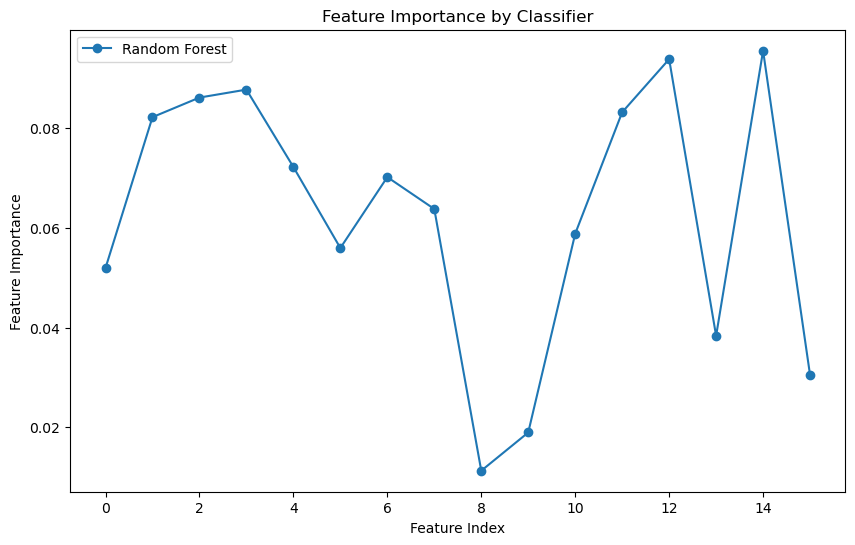

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

for name, classifier in classifiers:
    if isinstance(classifier, RandomForestClassifier):
        feature_importance = classifier.feature_importances_
        ax.plot(feature_importance, 'o-', label=name)
    else:
        # Handle other classifiers that may not have feature importances
        pass

ax.set_xlabel('Feature Index')
ax.set_ylabel('Feature Importance')
ax.legend()
plt.title('Feature Importance by Classifier')
plt.show()
